In [80]:
import random
import math
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

In [81]:
def generateData (numberOfClassEl, numberOfClasses):
    data = []
    for classNum in range(numberOfClasses):
        centerX, centerY = random.random()*5.0, random.random()*5.0
        for rowNum in range(numberOfClassEl):
            data.append([ [random.gauss(centerX,0.5), random.gauss(centerY,0.5)], classNum])
    return data

In [82]:
def splitTrainTest(data, testPercent):
    trainData = []
    testData  = []
    for row in data:
        if random.random() < testPercent:
            testData.append(row)
        else:
            trainData.append(row)
    return trainData, testData  

In [83]:
def KNN (trainData, testData, k, numberOfClasses):    
    def dist (a, b):
        return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    
    testLabels = []
    
    for testPoint in testData:
        # Расстояние между точками из тестовой выборки и всеми точками из тренировочной выборки
        testDist = [ [dist(testPoint, trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]
        # Количество точек каждого класса среди ближайших k
        #How many points of each class among nearest K
        stat = [0 for i in range(numberOfClasses)]
        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1
        # Присвоение класса с наибольшей встречаемостью среди k ближайших соседей
        testLabels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    return testLabels

pred 0, act 0
pred 0, act 0
pred 0, act 0
pred 0, act 0
pred 0, act 0
pred 0, act 0
pred 2, act 1
pred 2, act 1
pred 1, act 1
pred 1, act 1
pred 1, act 1
pred 2, act 1
pred 2, act 1
pred 1, act 1
pred 1, act 1
pred 2, act 2
pred 2, act 2
pred 2, act 2
pred 2, act 2
pred 2, act 2
pred 2, act 2


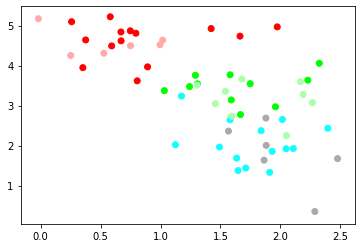

In [86]:
def create_and_classify_data(items_in_class_cnt, classes_cnt, k):   
    trainData = generateData(items_in_class_cnt, classes_cnt)
    trainData, testData = splitTrainTest(trainData, 0.3)
    testData_points = [x[0] for x in testData]
    
    testMeshLabels = KNN(
        trainData, 
        testData_points,
        k, 
        classes_cnt)
    
    result = zip(testMeshLabels, [x[1] for x in testData])
    for pred, act in result:
        print(f'pred {pred}, act {act}')
    
    testColormap   = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAAA'])
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#0FFFFF'])
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.scatter([testData[i][0][0] for i in range(len(testData))],
               [testData[i][0][1] for i in range(len(testData))],
               c=[testData[i][1] for i in range(len(testData))],
               cmap=testColormap)
    pl.show()
    

create_and_classify_data(20, 3, 4)